In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600),
                  columns = ['A', 'B', 'C'])

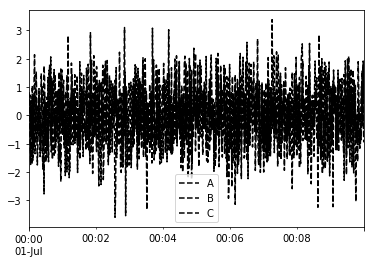

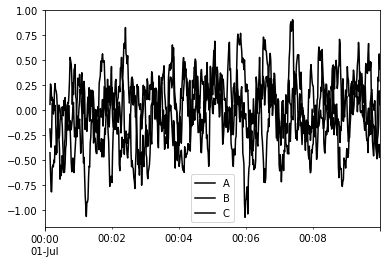

In [4]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

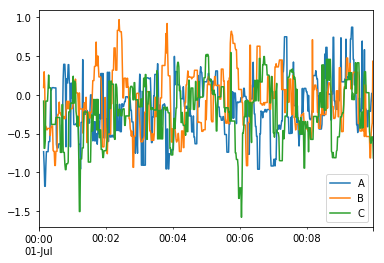

In [9]:
r.quantile(.5).plot()

In [5]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,0.671429,0.311350,0.152245
2016-07-01 00:00:02,0.331242,0.465070,-0.166473
2016-07-01 00:00:03,-0.291443,0.103623,-0.517848
2016-07-01 00:00:04,-0.452230,0.152412,-0.250775
2016-07-01 00:00:05,-0.707386,0.025737,-0.380803
2016-07-01 00:00:06,-0.912645,-0.072890,-0.087205
2016-07-01 00:00:07,-0.630774,0.078516,-0.371461
2016-07-01 00:00:08,-0.649063,-0.149015,-0.319920
2016-07-01 00:00:09,-0.423791,0.050138,-0.144093


In [6]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [7]:
df.head()

,A,B,C,D
2016-06-06,0.132549,0.096531,1.515803,-0.950127
2016-06-07,0.789035,0.593430,-0.935082,0.346733
2016-06-08,-2.965870,1.401848,-0.347632,-1.959839
2016-06-09,0.799159,1.185727,-1.663628,1.384131
2016-06-10,-1.426304,0.802282,-1.012189,-1.023456


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e5ec828>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10e91b208>], dtype=object)

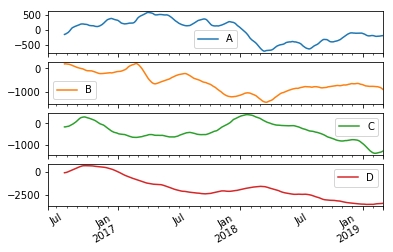

In [8]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [10]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,1.472881,1.041718,1.377405,0.751315


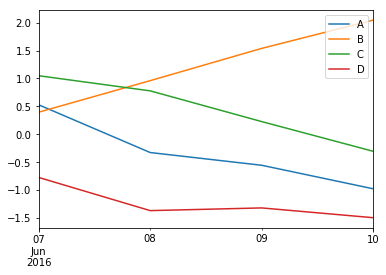

In [14]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5].plot()